  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=638f45b03ca68b64df045703e80390729f4fb11fb7c7564d3e03166605f5b1b8
  Stored in directory: /root/.cache/pip/wheels/a3/6b/89/3bec14288af8e0729d088fb41a785e583d49e772f2529c7676
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16226 sha256=c0fc5a66fb8166bb52c11d305f56c038dd3542cedec8df0059a61a821da4bbdc
  Stored in directory: /root/.cache/pip/wheels/fc/40/7a/4d3b2dc2e80b4b3bbda89eec94fcefd6c8bd1101cc7bb89554
  Created wheel for stdiomask: filename=stdiomask

<ipython-input-1-3d584b668e32>:62: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


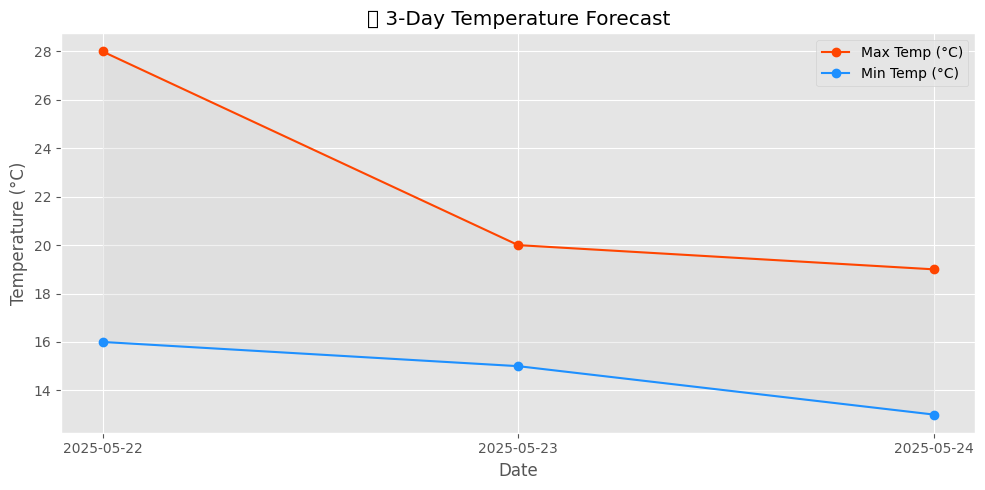

<ipython-input-1-3d584b668e32>:73: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


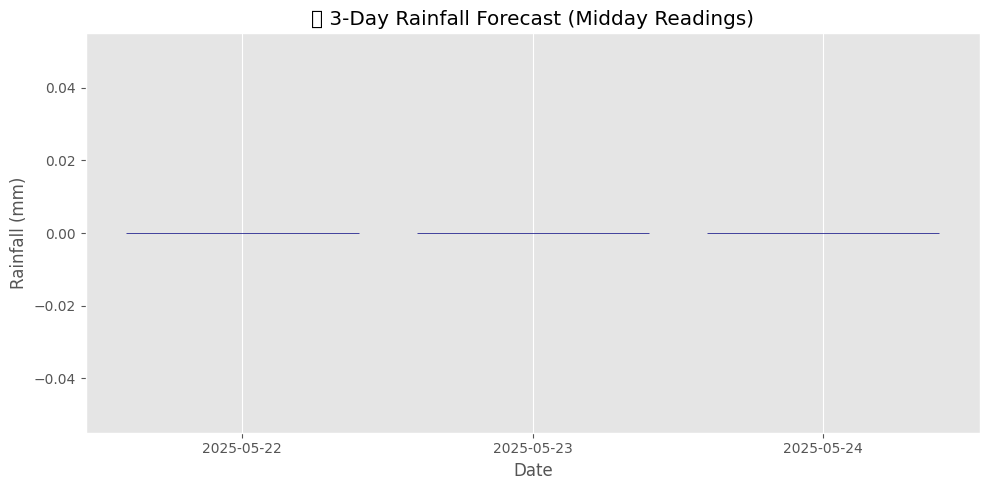


💬 MOTIVATION BOOST:
You're not just checking the weather, Trisha. You're forecasting your future.
Please select one of the following:
1. Check today’s weather
2. Visualise 3-day forecast
3. Ask a natural question (e.g. 'What's the weather in Curepipe tomorrow?')
4. Exit
2
Enter city name: 

In [ ]:
# === INSTALL FIRST ===
# pip install pyinputplus matplotlib requests
!pip install pyinputplus
import requests
import random
import matplotlib.pyplot as plt
import pyinputplus as pyip
import re
import time

plt.style.use('ggplot')

# === MOTIVATIONAL QUOTES ===
def show_motivational_quote(name="Trisha"):
    quotes = [
        f"{name}, every cloud has a silver lining — keep looking up! ☁️✨",
        f"You're not just checking the weather, {name}. You're forecasting your future.",
        f"Rain or shine, {name}, you're built to thrive.",
        f"{name}, today is a blank sky — paint it bold.",
        f"Even storms can’t stop your light, {name}. Keep shining.",
        f"Weather changes — just like challenges. You got this, {name}.",
        f"{name}, don’t wait for the perfect weather. Create it."
    ]
    print("\n💬 MOTIVATION BOOST:")
    print(random.choice(quotes))

# === FETCH WEATHER DATA ===
def fetch_weather(location):
    try:
        url = f"https://wttr.in/{location}?format=j1"
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"😬 Oops! Couldn’t fetch weather for {location}. Details: {e}")
        return None

# === DISPLAY CURRENT WEATHER ===
def display_current_weather(data, location):
    try:
        current = data['current_condition'][0]
        print(f"\n📍 Current Weather in {location.title()}")
        print(f"🌡️ Temp: {current['temp_C']}°C (Feels like {current['FeelsLikeC']}°C)")
        print(f"🌧️ Condition: {current['weatherDesc'][0]['value']}")
        print(f"💧 Humidity: {current['humidity']}%")
        print(f"💨 Wind: {current['windspeedKmph']} km/h")
        show_motivational_quote("Trisha")
    except KeyError:
        print("⚠️ Data missing — can't show weather right now.")

# === TEMPERATURE PLOT ===
def plot_temperature(dates, max_temps, min_temps):
    plt.figure(figsize=(10, 5))
    plt.plot(dates, max_temps, marker='o', color='orangered', label="Max Temp (°C)")
    plt.plot(dates, min_temps, marker='o', color='dodgerblue', label="Min Temp (°C)")
    plt.fill_between(dates, min_temps, max_temps, color='lightgrey', alpha=0.3)
    plt.title("🌡️ 3-Day Temperature Forecast")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === RAINFALL PLOT ===
def plot_rainfall(dates, rainfall):
    plt.figure(figsize=(10, 5))
    plt.bar(dates, rainfall, color='skyblue', edgecolor='navy')
    plt.title("🌧️ 3-Day Rainfall Forecast (Midday Readings)")
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# === VISUALISE FORECAST ===
def visualise_forecast(data):
    try:
        days = data['weather']
        dates, max_temps, min_temps, rainfall = [], [], [], []

        for day in days:
            dates.append(day['date'])
            max_temps.append(int(day['maxtempC']))
            min_temps.append(int(day['mintempC']))
            rainfall.append(float(day['hourly'][4]['precipMM']))  # Midday reading

        vis_choice = pyip.inputMenu([
            "Temperature only 🌡️",
            "Rainfall only 🌧️",
            "Both 🌦️"
        ], numbered=True, prompt="\n📊 What would you like to visualise?\n")

        if vis_choice == "Temperature only 🌡️":
            plot_temperature(dates, max_temps, min_temps)
        elif vis_choice == "Rainfall only 🌧️":
            plot_rainfall(dates, rainfall)
        elif vis_choice == "Both 🌦️":
            plot_temperature(dates, max_temps, min_temps)
            plot_rainfall(dates, rainfall)

        show_motivational_quote("Trisha")

    except KeyError:
        print("⚠️ Forecast data is incomplete.")

# === PARSE NATURAL QUESTION ===
def parse_question(question):
    location_match = re.search(r"in ([a-zA-Z\s]+)", question)
    location = location_match.group(1).strip() if location_match else "Port Louis"

    day_offset = 0
    if "tomorrow" in question.lower():
        day_offset = 1
    elif "day after" in question.lower():
        day_offset = 2

    return location, day_offset

# === ANSWER WEATHER QUESTION ===
def answer_weather_question(question):
    location, day_offset = parse_question(question)
    data = fetch_weather(location)

    if not data:
        print("❌ Could not retrieve data.")
        return

    if day_offset == 0:
        display_current_weather(data, location)
    else:
        try:
            day_data = data['weather'][day_offset]
            print(f"\n📅 Forecast for {location.title()} on {day_data['date']}:")
            print(f"🌡️ Max: {day_data['maxtempC']}°C | Min: {day_data['mintempC']}°C")
            print(f"🌧️ Condition: {day_data['hourly'][4]['weatherDesc'][0]['value']}")
            print(f"💧 Rainfall: {day_data['hourly'][4]['precipMM']} mm")
            show_motivational_quote("Trisha")
        except IndexError:
            print("⚠️ That forecast isn't available yet.")

# === MAIN MENU ===
def main():
    print("👋 Welcome to Trisha’s Weather Advisor 🌦️")
    print("Your cozy command-line weather assistant is ready!\n")

    while True:
        choice = pyip.inputMenu([
            "Check today’s weather",
            "Visualise 3-day forecast",
            "Ask a natural question (e.g. 'What's the weather in Curepipe tomorrow?')",
            "Exit"
        ], numbered=True)

        if choice == "Check today’s weather":
            city = pyip.inputStr("Enter city name: ")
            data = fetch_weather(city)
            if data:
                display_current_weather(data, city)
            time.sleep(2)

        elif choice == "Visualise 3-day forecast":
            city = pyip.inputStr("Enter city name: ")
            data = fetch_weather(city)
            if data:
                visualise_forecast(data)
            time.sleep(2)

        elif choice.startswith("Ask a natural question"):
            question = pyip.inputStr("Go ahead, ask me: ")
            answer_weather_question(question)
            time.sleep(2)

        elif choice == "Exit":
            print("👋 See you next time, Trisha! Stay radiant and weather-wise 💖")
            break

# === RUN APP ===
if __name__ == "__main__":
    main()
